In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data=pd.read_csv('G:\Iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

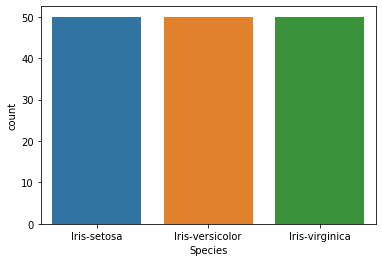

In [10]:
sns.countplot(data['Species'])
plt.ylable("Species Counts")

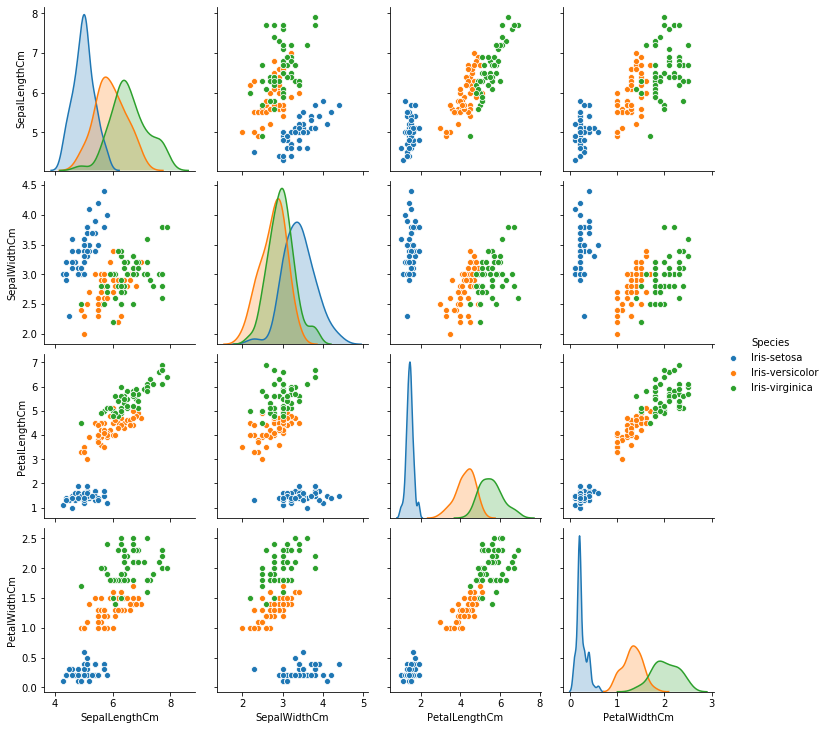

In [11]:
data.drop('Id',axis=1,inplace=True)
sns.pairplot(data,hue='Species')

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

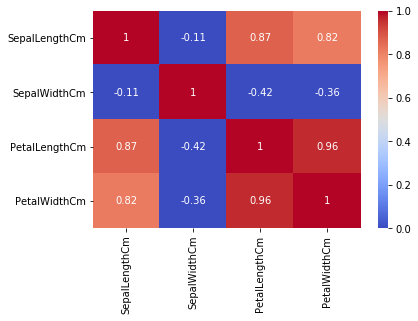

In [13]:
corr=data.corr()
#plt.figure(figsize(14,6))
sns.heatmap(corr, vmin=0, vmax=1, annot=True, cmap='coolwarm')
plt.yticks(rotation='0')

In [14]:
x=data.drop('Species', axis=1)
y=data['Species']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.8, random_state=1)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(f"Accuracy of the cassifier= {accuracy_score(y_pred,y_test)*100:.2f}%")

Accuracy of the cassifier= 91.67%


In [32]:
y_pred=model.predict([[5.8,2.2,4.2,1.3]])
print(f"the specis:{y_pred[0]}")

the specis:Iris-versicolor


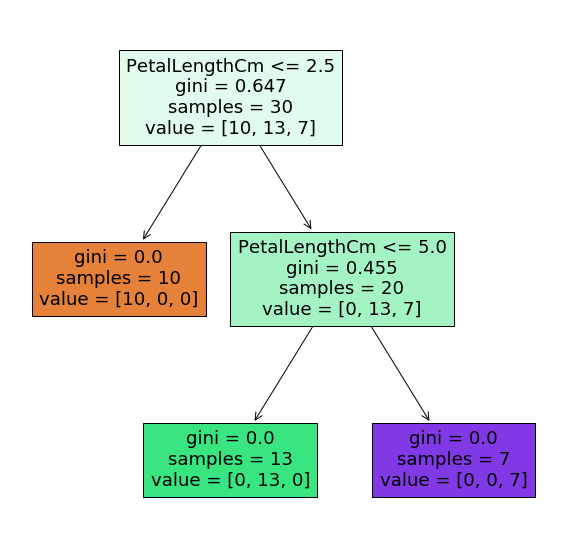

In [36]:
from sklearn import tree
fig=plt.figure(figsize=(10,10))
fig=tree.plot_tree(model, feature_names=data.columns, filled='True')
plt.show()